# ***Задание 5.***

---





# **Кластеризация**
 **Цель работы**: научиться производить кластерный анализ данных с использованием метода К-средних.

Набор данных представляет операции продажи одежды в магазине. Он дает информацию о покупательском поведении, о товарах, которые покупают, о способах оплаты и уровне удовлетворенности покупателей товарами.

Атрибуты:
* Customer Reference ID – идентификатор покупателя
* Item Purchased – приобретенный товар
* Purchase Amount (USD) – сумма покупки (в долларах США)
* Date Purchase – дата покупки
* Review Rating – оценка по отзывам (уровень удовлетворенности клиентов от 1 до 5)
* Payment Method – способ оплаты


# *1. Импортируйте необходимые библиотеки*

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# *2. Получить представление о наборе данных*

In [49]:
df=pd.read_csv('Fashion_Retail_Sales.csv')
df.shape


(3400, 6)

In [50]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [51]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


# *3. Разведочный анализ.*

Text(0, 0.5, 'Частота')

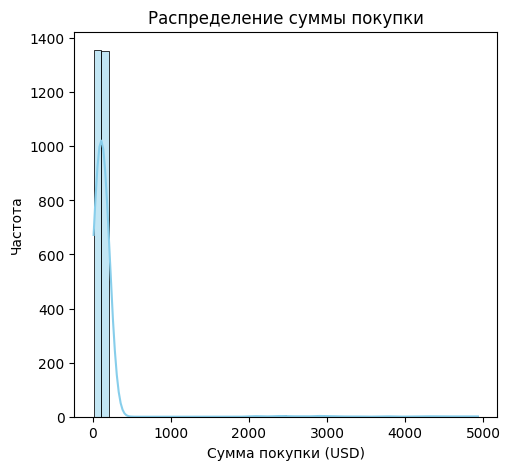

In [53]:
plt.figure(figsize=(12, 5))
# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['Purchase Amount (USD)'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Распределение суммы покупки')
plt.xlabel('Сумма покупки (USD)')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

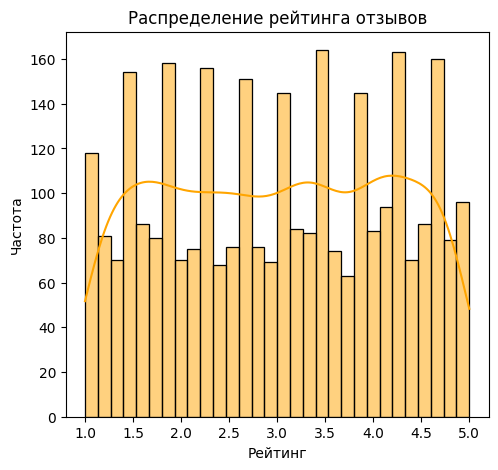

In [54]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Review Rating'].dropna(), bins=30, kde=True, color='orange')
plt.title('Распределение рейтинга отзывов')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

/tmp/ipython-input-110165930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


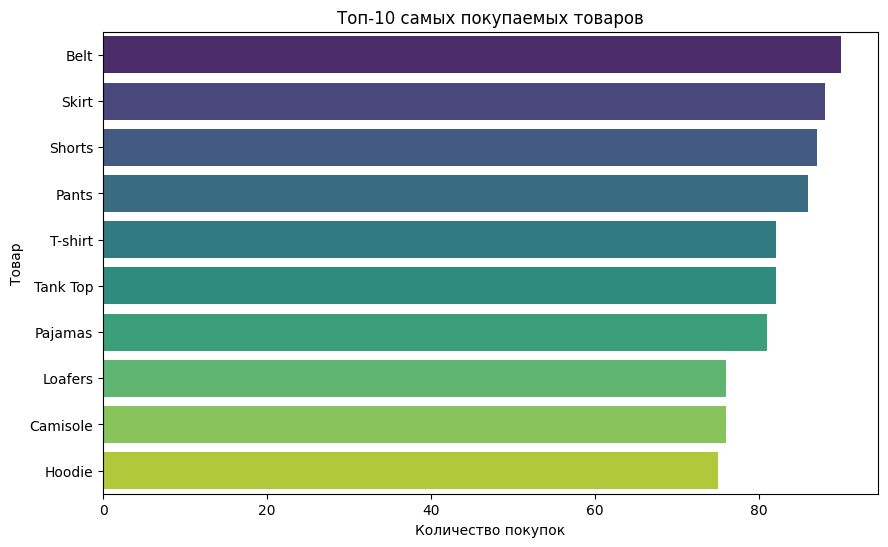

In [55]:
top_items= df['Item Purchased'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Топ-10 самых покупаемых товаров')
plt.xlabel('Количество покупок')
plt.ylabel('Товар')
plt.show()

**Выводы: Большинство покупок в диапазоне 0–200 USD.**

**Есть выбросы (дорогие покупки > 4000 USD).**

**Распределение рейтингов близко к нормальному.**

**Много пропусков в рейтингах.**

**Самые популярные товары это - пояс, юбка, шорты, штаны.**

# *4. Предобработка данных.*

In [56]:
# Проверяем наличие пропущенных значений
df.isnull().sum()

,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [57]:
# Создаем копию датафрейма
df_copy = df.copy()

# Заполним пропуски средним арифметическим
df_copy['Purchase Amount (USD)'] = df_copy['Purchase Amount (USD)'].fillna(df_copy['Purchase Amount (USD)'].mean())
df_copy['Review Rating'] = df_copy['Review Rating'].fillna(df_copy['Review Rating'].mean())

# Проверяем наличие пропущенных значений
df_copy.isnull().sum()


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),0
Date Purchase,0
Review Rating,0
Payment Method,0


In [58]:
# Заменяем категориальные значения числовыми
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
df_copy['Item Purchased'] = labelencoder_o.fit_transform(df_copy['Item Purchased'])
df_copy['Date Purchase'] = labelencoder_o.fit_transform(df_copy['Date Purchase'])
df_copy['Payment Method'] = labelencoder_o.fit_transform(df_copy['Payment Method'])
df_copy.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,13,4619.0,49,2.999057,1
1,4115,46,2456.0,126,2.000000,1
2,4019,42,2102.0,266,4.100000,0
3,4097,20,3126.0,170,3.200000,0
4,3997,49,3003.0,322,4.700000,0


In [59]:
# Стандартизация
scaler = StandardScaler()
X = scaler.fit_transform(df_copy)
print(X[:5])

[[-0.45017896 -0.79440195 11.82878047 -1.25622927  0.          0.95963741]
 [ 1.56580319  1.48308934  6.09503141 -0.52736551 -0.90836331  0.95963741]
 [-0.42939564  1.20702979  5.15663697  0.79784134  1.00099976 -1.04206025]
 [ 1.19170341 -0.31129774  7.87108868 -0.11087193  0.1827013  -1.04206025]
 [-0.88662871  1.690134    7.54503637  1.32792407  1.54653206 -1.04206025]]


# *5. Метод k-средних*

In [60]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

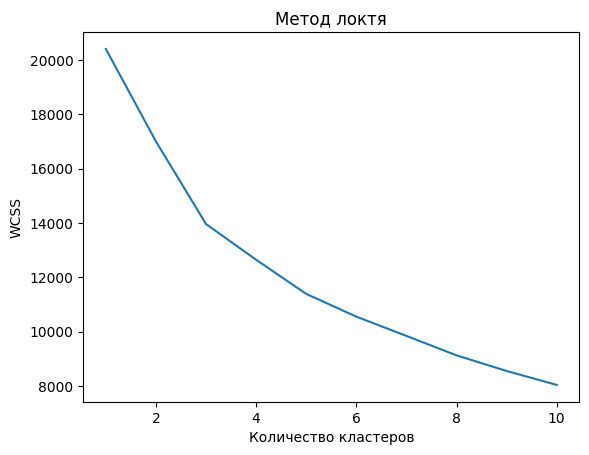

In [61]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Обучение модели с 5 кластерами
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [63]:
# Предсказание кластеров
clusters = kmeans.predict(X)
df_copy['cluster'] = clusters
df_copy.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,cluster
0,4018,13,4619.0,49,2.999057,1,2
1,4115,46,2456.0,126,2.000000,1,2
2,4019,42,2102.0,266,4.100000,0,2
3,4097,20,3126.0,170,3.200000,0,2
4,3997,49,3003.0,322,4.700000,0,2


# *6. Снижение размерности набора данных с помощью метода PCA.*

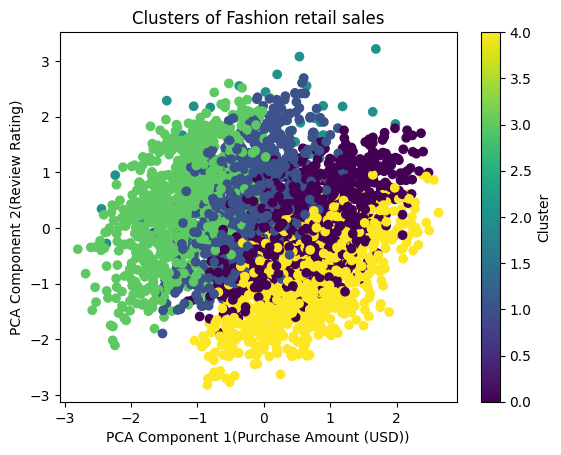

In [64]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 2], X_pca[:, 4], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1(Purchase Amount (USD))')
plt.ylabel('PCA Component 2(Review Rating)')
plt.title('Clusters of Fashion retail sales')
plt.colorbar(label='Cluster')
plt.show()

In [65]:
# Анализ средних значений по кластерам
cluster_groups = df_copy.groupby('cluster')
cluster_groups.mean()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
cluster,,,,,,
0,4036.412371,22.320733,115.704641,91.701031,2.965198,1.00000
1,4034.682500,12.183750,114.598415,195.445000,2.933543,0.00000
2,4048.279070,24.418605,3329.116279,185.837209,3.318407,0.55814
3,4043.520345,36.934649,119.223170,168.138101,3.041464,0.00000
4,4043.460481,26.459336,114.871144,271.548683,3.037828,1.00000


*Кластер 0*  

Низкие траты: $115.70
Низкие рейтинги: 2.97/5
Типичный товар: средняя категория (22.32)


*Кластер 1*

Низкие траты: $114.90
Низкие рейтинги: 2.93/5
Типичный товар: базовые позиции (12.18)


*Кластер 2*

Значительно выше среднего: $3,329.12
Высокие рейтинги: 3.32/5
Типичный товар: премиальные позиции (24.42)


*Кластер 3*

Низкие траты: $119.22
Средние рейтинги: 3.04/5
Типичный товар: разнообразный ассортимент (30.93)


*Кластер 4*

Низкие траты: $114.87
Средние рейтинги: 3.04/5
Типичный товар: разнообразный ассортимент(28.46)



# *7. Произвести разведочный анализ*

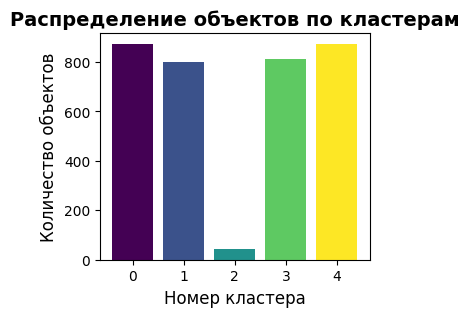

In [66]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(3, 4, 1)
cluster_counts = df_copy['cluster'].value_counts().sort_index()
bars = ax1.bar(cluster_counts.index, cluster_counts.values,
               color=plt.cm.viridis(np.linspace(0, 1, 5)))

ax1.set_title('Распределение объектов по кластерам', fontsize=14, fontweight='bold')
ax1.set_xlabel('Номер кластера', fontsize=12)
ax1.set_ylabel('Количество объектов', fontsize=12)
ax1.set_xticks(range(5))

[Text(1, 0, '0'),
 Text(2, 0, '1'),
 Text(3, 0, '2'),
 Text(4, 0, '3'),
 Text(5, 0, '4')]

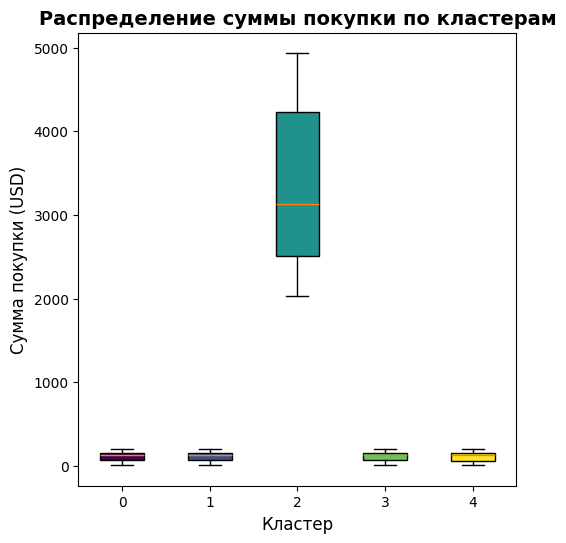

In [67]:
plt.figure(figsize=(26, 20))
ax3 = plt.subplot(3, 4, 3)
box_data = [df_copy[df_copy['cluster'] == i]['Purchase Amount (USD)'] for i in range(5)]
bp = ax3.boxplot(box_data, patch_artist=True)

# Раскрашиваем boxplot
colors = plt.cm.viridis(np.linspace(0, 1, 5))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_title('Распределение суммы покупки по кластерам', fontsize=14, fontweight='bold')
ax3.set_xlabel('Кластер', fontsize=12)
ax3.set_ylabel('Сумма покупки (USD)', fontsize=12)
ax3.set_xticklabels(range(5))

(1.0, 5.0)

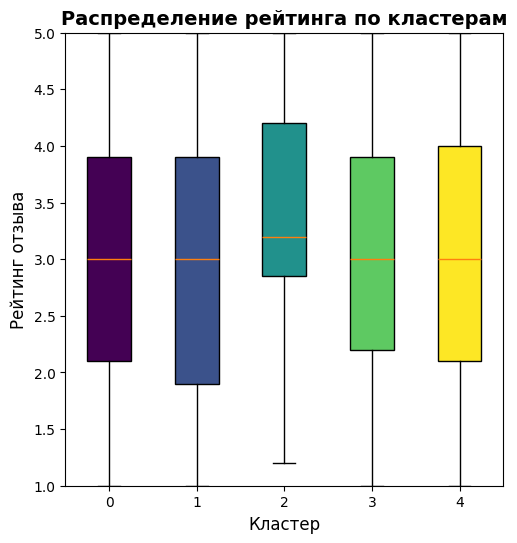

In [68]:
plt.figure(figsize=(26, 20))
ax4 = plt.subplot(3, 4, 4)
box_data_rating = [df_copy[df_copy['cluster'] == i]['Review Rating'] for i in range(5)]
bp_rating = ax4.boxplot(box_data_rating, patch_artist=True)

for patch, color in zip(bp_rating['boxes'], colors):
    patch.set_facecolor(color)

ax4.set_title('Распределение рейтинга по кластерам', fontsize=14, fontweight='bold')
ax4.set_xlabel('Кластер', fontsize=12)
ax4.set_ylabel('Рейтинг отзыва', fontsize=12)
ax4.set_xticklabels(range(5))
ax4.set_ylim([1, 5])

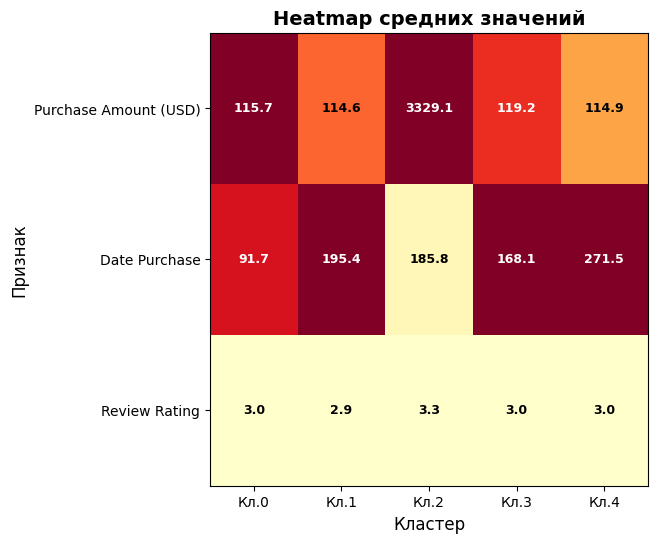

In [69]:
plt.figure(figsize=(26, 20))
ax5 = plt.subplot(3, 4, 5)
numeric_cols = ['Purchase Amount (USD)', 'Date Purchase', 'Review Rating']
cluster_means = df_copy.groupby('cluster')[numeric_cols].mean()

im = ax5.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
ax5.set_title('Heatmap средних значений', fontsize=14, fontweight='bold')
ax5.set_xlabel('Кластер', fontsize=12)
ax5.set_ylabel('Признак', fontsize=12)
ax5.set_xticks(range(5))
ax5.set_yticks(range(len(numeric_cols)))
ax5.set_xticklabels([f'Кл.{i}' for i in range(5)])
ax5.set_yticklabels(numeric_cols)

# Добавляем значения
for i in range(len(numeric_cols)):
    for j in range(5):
        value = cluster_means.iloc[j, i]
        text_color = 'black' if heatmap_data[i, j] < 0.6 else 'white'
        ax5.text(j, i, f'{value:.1f}', ha='center', va='center',
                color=text_color, fontsize=9, fontweight='bold')
